In [25]:
from cdsaxs_fitting.fitter import Fitter
from cdsaxs_fitting.simulations.stacked_trapezoid import StackedTrapezoidSimulation
import numpy as np
import corner

### How to do a diffraction simulation using cdsaxs package?

#### Prepare the data

In [26]:
pitch = 100 #nm distance between two trapezoidal bars
qzs = np.linspace(-0.1, 0.1, 121)
qxs = 2 * np.pi / pitch * np.ones_like(qzs)

# Define initial parameters and multiples

#Initial parameters
dwx = 0.1
dwz = 0.1
i0 = 10
bkg = 0.1
y1 = 0.
height = [20., 25.0]
bot_cd = 40.
swa = [90., 85.0]

langle = np.deg2rad(np.asarray(swa))
rangle = np.deg2rad(np.asarray(swa))

#simulation data
i_params = {'heights': np.asarray(height),
            'langles': langle,
            'rangles': rangle,
            'y1': y1,
            'bot_cd': bot_cd,
            'dwx': dwx,
            'dwz': dwz,
            'i0': i0,
            'bkg_cste': bkg
            }

#### Create instance of the Simulation class and call right method

In [3]:
Simulation1 = StackedTrapezoidSimulation(qys=qxs, qzs=qzs)

intensity = Simulation1.simulate_diffraction(params=i_params)

#### Introducing a little noise to the simulated data to make it more realistic

Text(0.5, 0, 'qz')

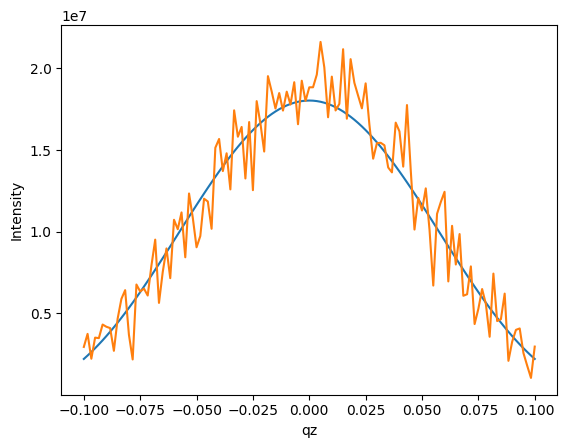

In [18]:
import matplotlib.pyplot as plt
intensity_noisy = intensity + np.sqrt(intensity) * np.random.normal(0, 500, intensity.shape)

plt.plot(qzs, intensity)
plt.plot(qzs, intensity_noisy)
plt.ylabel('Intensity')
plt.xlabel('qz')

## How to fit the data using cdsaxs package?

#### Prepare the data

In [5]:
var_ratio = 0.001
var_height = var_ratio * height[0]
var_langle = var_ratio * langle[0]
var_rangle = var_ratio * rangle[0]
initial_params = {'heights': {'value': height, 'variation': var_height},
                    'langles': {'value': langle, 'variation': var_langle},
                    'rangles': {'value': rangle, 'variation': var_rangle},
                    'y1': {'value': y1, 'variation': 10E-5},
                    'bot_cd': {'value': bot_cd, 'variation': 10E-5},
                    'dwx': {'value': dwx, 'variation': 10E-5},
                    'dwz': {'value': dwz, 'variation': 10E-5},
                    'i0': {'value': i0, 'variation': 10E-5},
                    'bkg_cste': {'value': bkg, 'variation': 10E-5}
                    }

#### First create an instance of the Simulation class and pass it to the Fitter class along with data to fit

In [19]:
Simulation2 = StackedTrapezoidSimulation(use_gpu=False, qys=qxs, qzs=qzs, initial_guess=initial_params)

Fitter1 = Fitter(Simulation=Simulation2, exp_data=intensity)

#### Then call the fit method of the Fitter class that you want

In [22]:
cmaes = Fitter1.cmaes(sigma=100, ngen=200, popsize=1000, mu=10, n_default=12, restarts=10, tolhistfun=10E-5, ftarget=10, restart_from_best=True, verbose=False)
mcmc = Fitter1.mcmc(N=12, sigma = np.asarray([100] * 12), nsteps=100, nwalkers=1000, dir_save='./')


  0%|          | 0/100 [00:00<?, ?it/s]/nobackup/nd276333/emcee_env/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
  6%|▌         | 6/100 [00:00<00:05, 17.77it/s]/nobackup/nd276333/Workspace/cdsaxs/src/cdsaxs_fitting/simulations/stacked_trapezoid.py:394: RuntimeWarning: invalid value encountered in divide
  (1 - self.xp.exp(-1j * heights[:,:, self.xp.newaxis] / tan1 * val1)) / val1)
/nobackup/nd276333/Workspace/cdsaxs/src/cdsaxs_fitting/simulations/stacked_trapezoid.py:393: RuntimeWarning: invalid value encountered in divide
  form_factor = (tan1 * self.xp.exp(-1j * qys * y1[:,:, self.xp.newaxis]) *
100%|██████████| 100/100 [00:04<00:00, 23.28it/s]
/nobackup/nd276333/emcee_env/lib/python3.11/site-packages/emcee/autocorr.py:38: RuntimeWarning: invalid value encountered in divide
  acf /= acf[0]


Saved to ./population_mcmc.csv
Saved to ./


#### variable "mcmc" now contains a dataframe with the fitted parameters and it's statistics

In [23]:
mcmc

,mean,std,count,min,max,lower_ci,upper_ci,uncertainity
height1,20.991305,0.388484,62370,15.385459,23.472610,20.987298,20.995312,0.004007
height2,24.034059,0.437929,62370,19.330313,30.926736,24.029542,24.038576,0.004517
langle1,1.541163,0.049045,62370,1.248772,2.233870,1.540657,1.541669,0.000506
langle2,1.498193,0.042529,62370,0.744646,2.297001,1.497754,1.498632,0.000439
rangle1,1.612237,0.046393,62370,1.237489,2.198178,1.611759,1.612716,0.000479
rangle2,1.442183,0.037094,62370,1.215714,2.245145,1.441801,1.442566,0.000383
y1,0.007551,0.002295,62370,0.000037,0.045677,0.007528,0.007575,0.000024
bot_cd,39.997452,0.002691,62370,39.957210,40.032323,39.997424,39.997480,0.000028
dwx,0.087386,0.002301,62370,0.052874,0.113798,0.087363,0.087410,0.000024
dwz,0.089797,0.002609,62370,0.053889,0.141462,0.089770,0.089824,0.000027


You can plot the correlation in a corner plot in the following way:

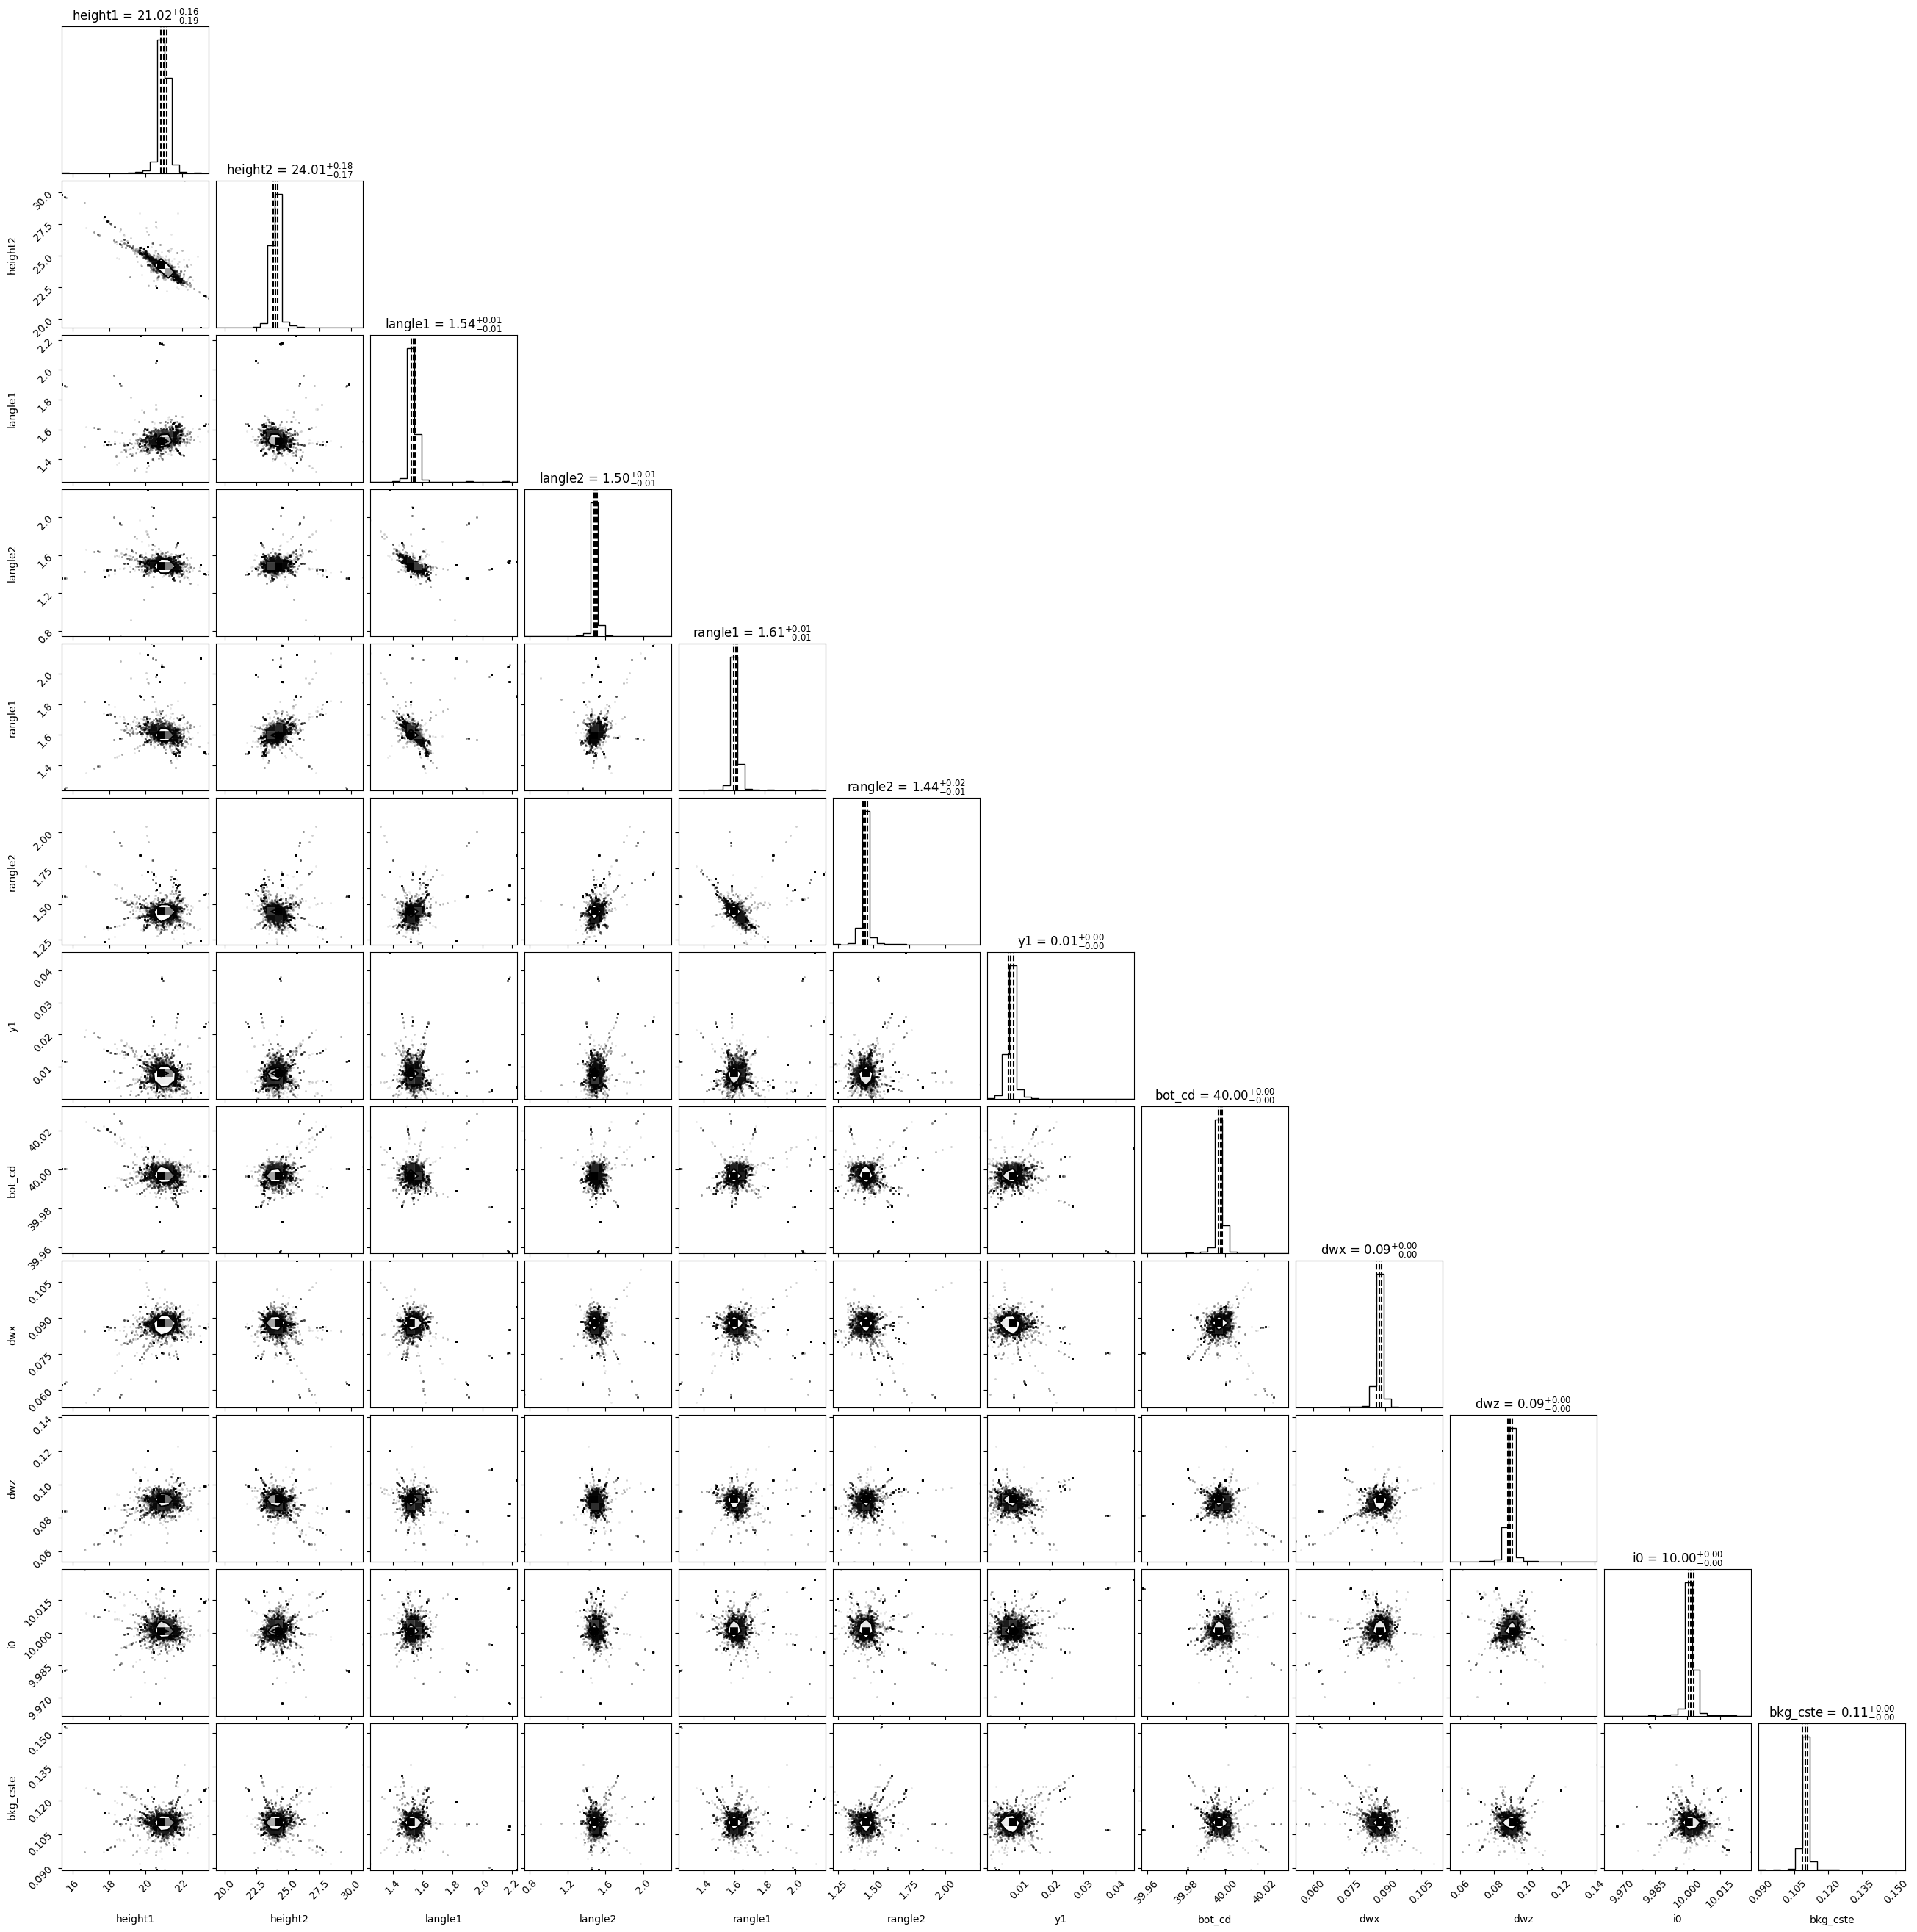

In [24]:
# Fitter1.plot_correlation(file='./population_mcmc.csv')

## testing the overlay class

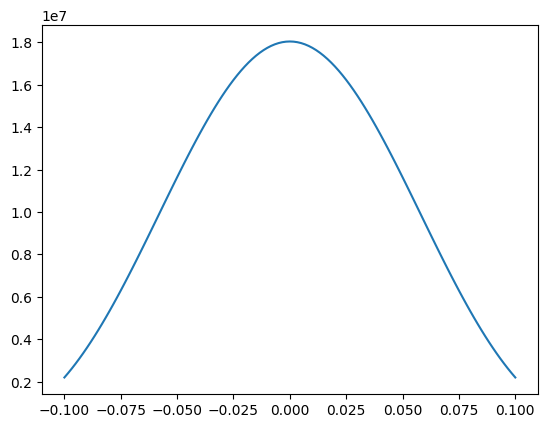

In [1]:
from cdsaxs_fitting.simulations.overlay import OverlaySimulation
import numpy as np
import matplotlib.pyplot as plt

pitch = 100 #nm distance between two trapezoidal bars
qzs = np.linspace(-0.1, 0.1, 121)
qxs = 2 * np.pi / pitch * np.ones_like(qzs)

# Define initial parameters and multiples

#Initial parameters
dwx = 0.1
dwz = 0.1
i0 = 10
bkg = 0.1
y1 = 0.
height = [20., 25.0]
bot_cd = 40.
swa = [90., 85.0]
overlay = 0.5

langle = np.deg2rad(np.asarray(swa))
rangle = np.deg2rad(np.asarray(swa))

#simulation data
overlay_params = {'heights': np.asarray(height),
            'langles': langle,
            'rangles': rangle,
            'y1': y1,
            'bot_cd': bot_cd,
            'dwx': dwx,
            'dwz': dwz,
            'i0': i0,
            'bkg_cste': bkg,
            'overlay': overlay
            }

Overlay = OverlaySimulation(qys=qxs, qzs=qzs)
intensity_overlay = Overlay.simulate_diffraction(params=overlay_params)
plt.plot(qzs, intensity_overlay)



In [ ]:
overlay = df.filter(like='overlay')